## **ARYAN SHARMA (20BEC0723)**

---
# ASSIGNMENT - 3


In [ ]:
#UPLOADING DATA SET FROM DRIVE
#GIVING DRIVE ACCESS TO COLAB
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen=ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen=ImageDataGenerator(rescale=(1./255))

In [ ]:
train=train_gen.flow_from_directory('/content/gdrive/MyDrive/BIRDS/train_data/train_data', target_size=(120,120),class_mode='categorical',batch_size=8)
test=test_gen.flow_from_directory('/content/gdrive/MyDrive/BIRDS/test_data/test_data', target_size=(120,120),class_mode='categorical',batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

In [ ]:
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 256s 14s/step - loss: 5.3879 - accuracy: 0.1200 - val_loss: 2.7920 - val_accuracy: 0.0382
Epoch 2/10
19/19 [==============================] - 128s 7s/step - loss: 2.7772 - accuracy: 0.0600 - val_loss: 2.7842 - val_accuracy: 0.0446
Epoch 3/10
19/19 [==============================] - 128s 7s/step - loss: 2.6481 - accuracy: 0.1267 - val_loss: 2.7825 - val_accuracy: 0.1529
Epoch 4/10
19/19 [==============================] - 129s 7s/step - loss: 2.4505 - accuracy: 0.2000 - val_loss: 2.6781 - val_accuracy: 0.0892
Epoch 5/10
19/19 [==============================] - 117s 6s/step - loss: 2.4009 - accuracy: 0.2067 - val_loss: 2.6503 - val_accuracy: 0.1019
Epoch 6/10
19/19 [==============================] - 132s 7s/step - loss: 2.3611 - accuracy: 0.1800 - val_loss: 2.8070 - val_accuracy: 0.1274
Epoch 7/10
19/19 [==============================] - 108s 6s/step - loss: 2.2345 - accuracy: 0.2467 - val_loss: 2.7606 - val_accuracy: 0.1529
Epoch 8/10
1

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 20)      560       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 20)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 69620)             0         
                                                                 
 dense (Dense)               (None, 45)                3132945   
                                                                 
 dense_1 (Dense)             (None, 16)                736       
                                                                 
Total params: 3,134,241
Trainable params: 3,134,241
Non-trainable params: 0
______________________________________________

In [ ]:

model = Sequential()
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(62,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 118, 118, 12)      336       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 59, 59, 12)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 57, 24)        2616      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 24)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 36)        7812      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 36)      

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=25)

In [ ]:

# Testing

import numpy as np
from tensorflow.keras.preprocessing import image

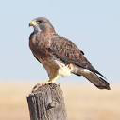

In [ ]:
# Testing 1
img1 = image.load_img('/content/hawk.jpeg',target_size=(120,120))
img1

In [ ]:
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output = ['blasti','bonegl','brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

1/1 [==============================] - 0s 26ms/step
1
bonegl


In [ ]:
# Testing 2
img2 = image.load_img('/content/_D32_10251.jpg',target_size=(120,120))
img2

In [ ]:
img2 = image.img_to_array(img2)
img2 = np.expand_dims(img2,axis=0)
pred = np.argmax(model.predict(img2))
print(pred)
output = ['blasti','bonegl','brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])

In [ ]:
# Testing 3
img3 = image.load_img('/content/gdrive/MyDrive/BIRDS/train_data/train_data/blasti/DSC_6382.jpg',target_size=(120,120))
img3

In [ ]:
img3 = image.img_to_array(img3)
img3 = np.expand_dims(img3,axis=0)
pred = np.argmax(model.predict(img3))
print(pred)
output = ['blasti','bonegl','brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']
print(output[pred])